# Problem Statement and Data Description


**Chennai House Price Prediction (Regression)**

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a
trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('chennai_house_price_prediction.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


In [3]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [4]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
data.shape

(7109, 19)

In [6]:
data['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

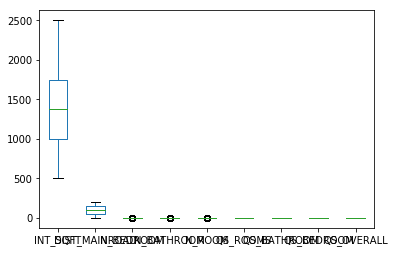

In [7]:
data[data.drop(['SALES_PRICE','COMMIS'],axis=1).columns].plot.box()

In [8]:
data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0],inplace=True)

In [9]:
data['N_BEDROOM'].mode()[0]

1.0

In [10]:
data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0],inplace=True)

In [11]:
data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean(),inplace=True)

In [12]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

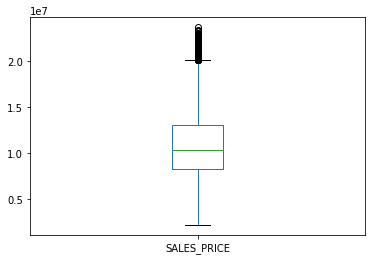

In [13]:
data['SALES_PRICE'].plot.box()

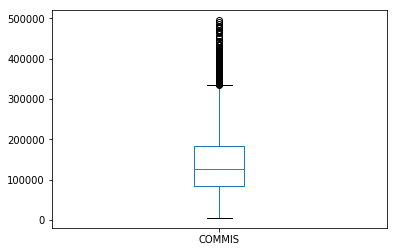

In [14]:
data['COMMIS'].plot.box()

In [15]:
data.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P07241,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.636939,1.213110,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802881,0.409534,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.525440,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.503254,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.880000,184506.000000,1.299390e+07


In [16]:
data.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        480
COMMIS           7011
SALES_PRICE      7057
dtype: int64

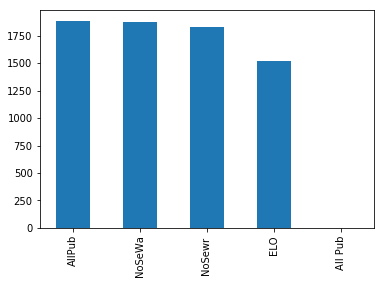

In [17]:
data['UTILITY_AVAIL'].value_counts().plot(kind = 'bar')

In [18]:
data.drop_duplicates()


,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


In [19]:
for i in range(0, len(data)):
    if pd.isnull(data['N_BATHROOM'][i])==True:
        if (data['N_BEDROOM'][i] == 1.0):
            data['N_BATHROOM'][i] = 1.0
        else: 
            data['N_BATHROOM'][i] = 2.0

In [20]:
data = data.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})

In [21]:
# Replacing Categories
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(data[i].value_counts())
    print('')

************ Value Count in AREA ************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Ana Nagar        3
Karapakam        3
Ann Nagar        2
Velchery         2
KKNagar          1
Adyr             1
Name: AREA, dtype: int64

************ Value Count in N_BEDROOM ************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

************ Value Count in N_BATHROOM ************
1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

************ Value Count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************ Value Count in SALE_COND ************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE

In [22]:
data['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
data['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [23]:
data['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'},inplace= True)
data['AREA'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [24]:
data['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
data['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [25]:
data['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)
data['UTILITY_AVAIL'].replace({'All Pub':'AllPub'},inplace = True)
data['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

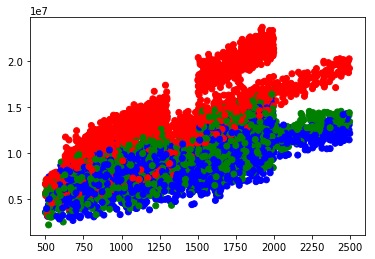

In [26]:
fig, ax = plt.subplots()
colors = {'Commercial':'red', 'House':'blue', 'Others':'green'}
ax.scatter(data['INT_SQFT'], data['SALES_PRICE'], c=data['BUILDTYPE'].apply(lambda x: colors[x]))
plt.show()

In [27]:
# sale price of houses wrt number of bedrooms and bathroomms 
data.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12131870.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


In [28]:
# SALE PRICE based on building type

data.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

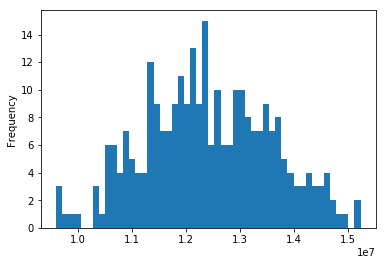

In [29]:
temp_df = data.loc[(data['BUILDTYPE']=='House')&(data['AREA']=='Anna Nagar')]
temp_df['SALES_PRICE'].plot.hist(bins=50)

In [30]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM         object
N_BATHROOM        object
N_ROOM            object
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [31]:
pd.get_dummies(data['AREA']).head()
data=pd.get_dummies(data.drop(['PRT_ID'],axis=1))

In [32]:
data.head()

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,AREA_Adyar,AREA_Anna Nagar,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,4.0,3.9,4.9,4.330,144400,7600000,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,4.9,4.2,2.5,3.765,304049,21717770,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,70,4.1,3.8,2.2,3.090,92114,13159200,1,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,4.7,3.9,3.6,4.010,77042,9630290,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,3.0,2.5,4.1,3.290,74063,7406250,0,0,...,0,1,0,0,0,1,0,0,0,0


In [33]:
data.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
COMMIS                     int64
SALES_PRICE                int64
AREA_Adyar                 uint8
AREA_Anna Nagar            uint8
AREA_Chrompet              uint8
AREA_KK Nagar              uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_Velachery             uint8
N_BEDROOM_1.0              uint8
N_BEDROOM_2.0              uint8
N_BEDROOM_3.0              uint8
N_BEDROOM_4.0              uint8
N_BATHROOM_1.0             uint8
N_BATHROOM_2.0             uint8
N_ROOM_2                   uint8
N_ROOM_3                   uint8
N_ROOM_4                   uint8
N_ROOM_5                   uint8
N_ROOM_6                   uint8
SALE_COND_AbNormal         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_

In [34]:
data.to_csv('data_cleaned_chennai_housing.csv')

In [35]:
# segregating depen. and indep. vars

x=data.drop(['SALES_PRICE'],axis=1)
y=data['SALES_PRICE']
x.shape,y.shape

((7109, 48), (7109,))

In [36]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=56)

In [37]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_log_error as MSLE

# Model 1 without normalization

In [38]:
# creating the model instance and fitting it
lr = LR()

lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# Predicting over the Train Set and calculating error

import math

train_predict = lr.predict(train_x)
k = math.sqrt(MSLE(train_predict, train_y))
print('Training Root Mean Squared Log Error', k )

Training Root Mean Squared Log Error 0.09000265363606941


In [40]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = math.sqrt(MSLE(test_predict, test_y))
print('Test Root Mean Squared Log Error ', k )

Test Root Mean Squared Log Error  0.09381193326982092


In [41]:
lr.coef_

array([ 3.88476920e+03, -1.53021146e+02, -7.52046129e+04, -6.38110796e+04,
       -7.09773803e+04,  2.69973026e+05,  2.81992233e+00,  8.31747543e+05,
        1.51343789e+06,  3.35347388e+05, -1.38594401e+06, -1.70042491e+06,
        1.63843257e+06, -1.23259647e+06,  2.82193378e+05, -4.10759378e+04,
       -4.68699855e+05,  2.27582415e+05,  2.16058932e+05, -2.16058932e+05,
       -7.64505574e+05, -6.07769011e+05,  1.15989527e+05,  1.02870264e+06,
        2.27582415e+05,  1.25745208e+04,  3.18609696e+05, -9.40642745e+04,
        3.60082360e+04, -2.73128178e+05, -5.03774331e+05,  5.03774331e+05,
        2.77398564e+06, -1.72231625e+06, -1.05166939e+06,  1.81425147e+05,
       -1.20536870e+05, -8.58130072e+04,  2.49247302e+04,  5.46827726e+05,
       -5.74787033e+05,  2.79593073e+04, -1.40552612e+06, -8.85957822e+05,
       -2.65759840e+05,  2.45016356e+05,  8.56215632e+05,  1.45601179e+06])

Text(0.5, 1.0, 'Coefficient plot')

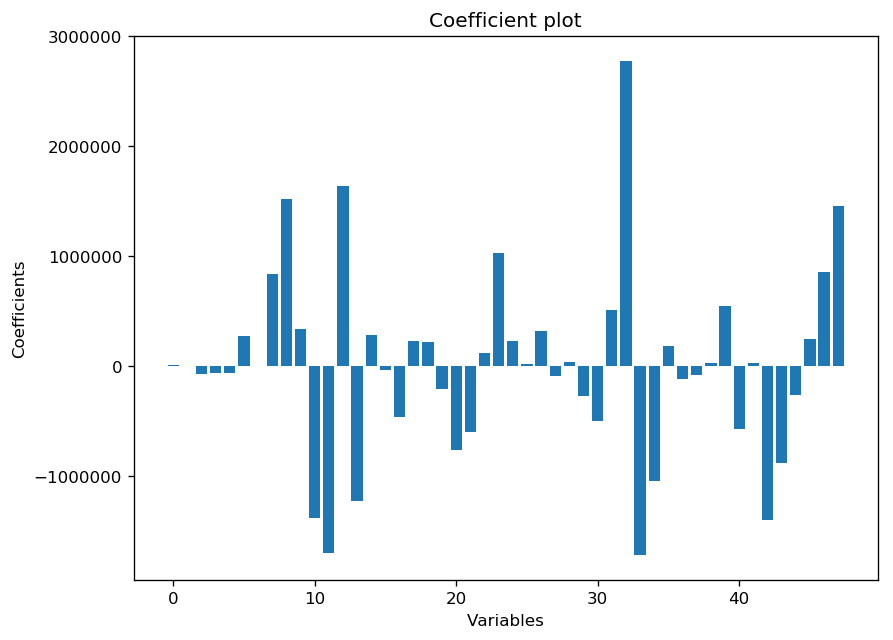

In [42]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y=lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [43]:
data.columns[32]

'PARK_FACIL_Yes'

In [44]:
test_y.shape,test_predict.shape,test_y.max()

((1778,), (1778,), 23247590)

In [45]:
#Checking assumptions of Linear Model

# Arranging and calculating the Residuals

residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict
})

residuals['residuals'] = residuals['fitted values']-residuals['predicted values']
residuals.head()


,fitted values,predicted values,residuals
2903,11949030,1.239922e+07,-450185.374850
3398,4873750,4.217054e+06,656696.303021
4011,9292000,9.781357e+06,-489356.998207
458,6149625,6.085785e+06,63839.984190
223,10722580,1.093312e+07,-210540.051835


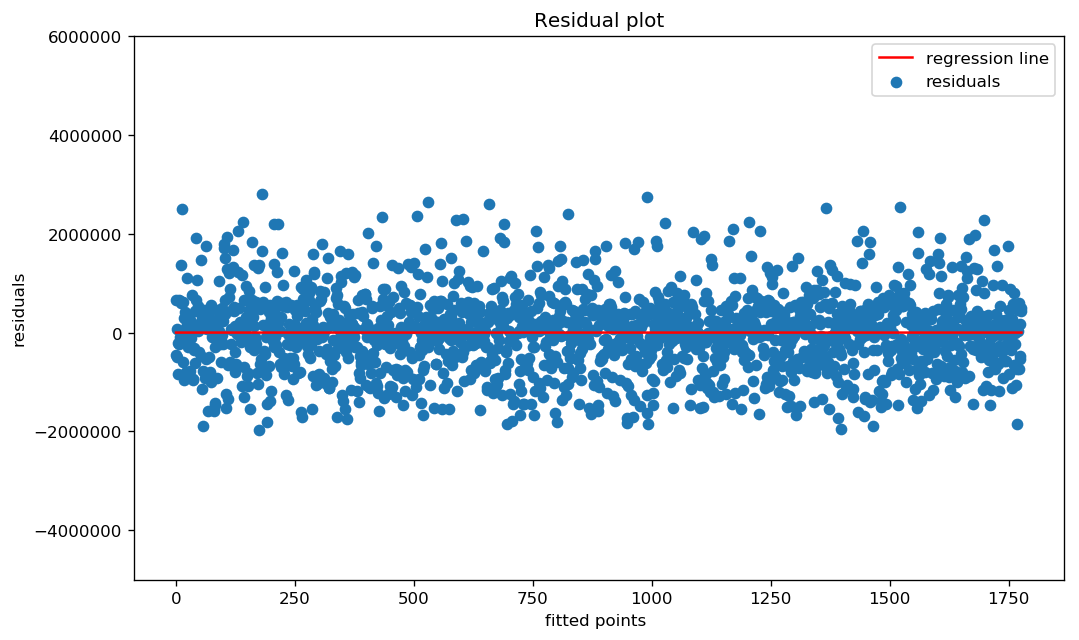

In [46]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,1778)
k = [0 for i in range(0,1778)]
plt.scatter( f, residuals.residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-500000e1, 600000e1)
plt.legend()

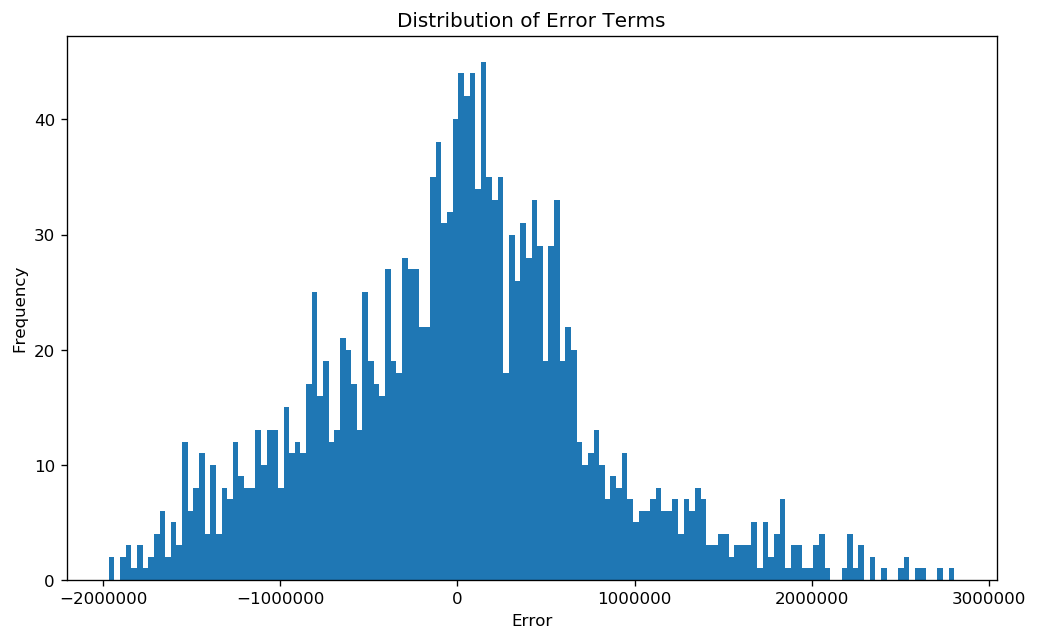

In [47]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

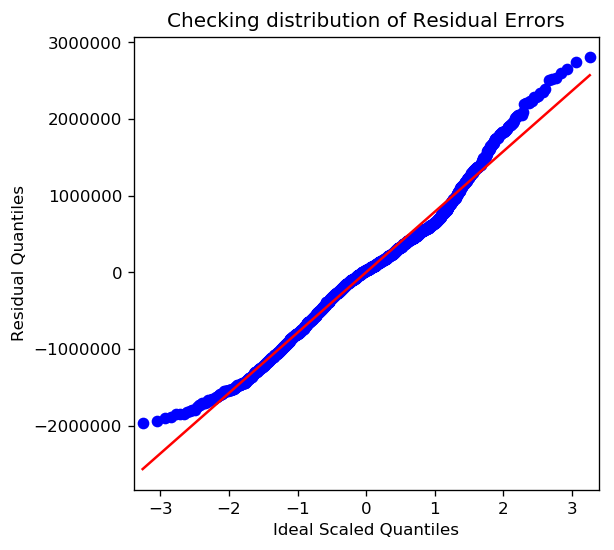

In [48]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [49]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

d:\pythoninstalledfiles\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


INT_SQFT                 2.450881e+01
DIST_MAINROAD            1.004956e+00
QS_ROOMS                 7.565722e+00
QS_BATHROOM              8.801166e+00
QS_BEDROOM               1.118322e+01
QS_OVERALL               2.559084e+01
COMMIS                   2.196518e+00
SALES_PRICE              2.289213e+01
AREA_Adyar                        inf
AREA_Anna Nagar                   inf
AREA_Chrompet                     inf
AREA_KK Nagar                     inf
AREA_Karapakkam                   inf
AREA_T Nagar                      inf
AREA_Velachery                    inf
N_BEDROOM_1.0                     inf
N_BEDROOM_2.0                     inf
N_BEDROOM_3.0                     inf
N_BEDROOM_4.0                     inf
N_BATHROOM_1.0                    inf
N_BATHROOM_2.0                    inf
N_ROOM_2                          inf
N_ROOM_3                          inf
N_ROOM_4                          inf
N_ROOM_5                          inf
N_ROOM_6                          inf
SALE_COND_Ab

In [50]:
# temp=data.copy()
# # temp['QS_BATHROOM'].mean(),temp['QS_BATHROOM'],temp['QS_BATHROOM'][0],temp['QS_BATHROOM'][0]-temp['QS_BATHROOM'].mean(),temp['QS_BATHROOM'][0]
# a=float(temp['QS_BATHROOM'][0])
# b=float(temp['QS_BATHROOM'].mean())#temp['QS_BATHROOM'].mean())
# a,b,a+b

In [51]:
# for i in range(len(temp['QS_BATHROOM'])):
#     temp['QS_BATHROOM'][i]=temp['QS_BATHROOM'][i]-temp['QS_BATHROOM'].mean()

# # temp.QS_BATHROOM=temp['QS_BATHROOM']-temp['QS_BATHROOM'].mean()
# type(temp['QS_BATHROOM']),type(data['QS_BATHROOM'])

In [52]:
# VIF = pd.Series([variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])], index =temp.columns)
# VIF

In [53]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [54]:
train_predict = lr.predict(train_x)
k = math.sqrt(MSLE(train_predict, train_y))
print('Training Root Mean Squared Log Error', k )

Training Root Mean Squared Log Error 0.09011904725272595


In [55]:
test_predict = lr.predict(test_x)
k = math.sqrt(MSLE(test_predict, test_y))
print('Test Root Mean Squared Log Error ', k )

Test Root Mean Squared Log Error  0.09400855793843893


Text(0.5, 1.0, 'Normalized Coefficient plot')

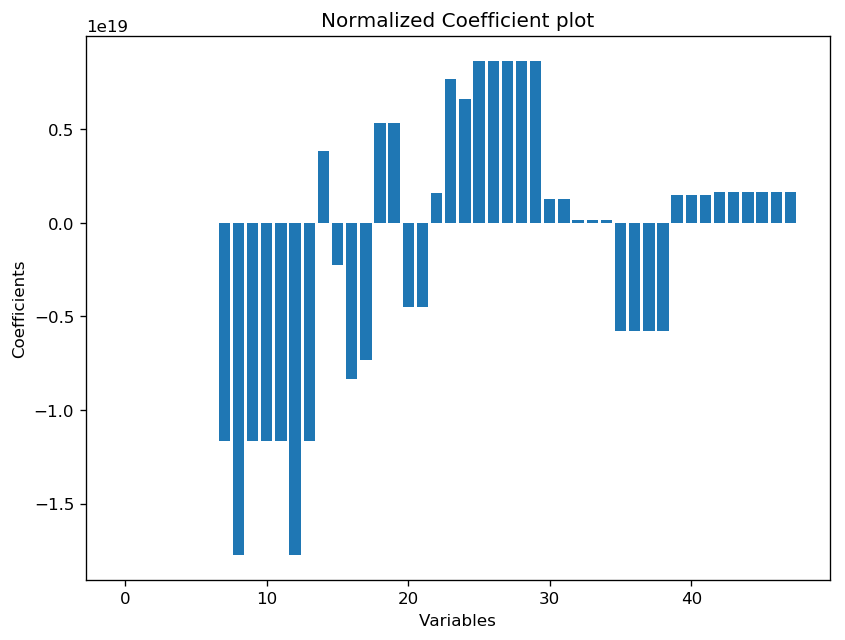

In [56]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [57]:
data.columns[12]

'AREA_Karapakkam'

In [58]:
x=data.drop(['SALES_PRICE'],axis=1)
y=data['SALES_PRICE']
x.shape,y.shape

((7109, 48), (7109,))

In [59]:
x

,INT_SQFT,DIST_MAINROAD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,...,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,131,4.0,3.9,4.9,4.330,144400,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1986,26,4.9,4.2,2.5,3.765,304049,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,909,70,4.1,3.8,2.2,3.090,92114,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1855,14,4.7,3.9,3.6,4.010,77042,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,84,3.0,2.5,4.1,3.290,74063,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,3.0,2.2,2.4,2.520,107060,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7105,1897,52,3.6,4.5,3.3,3.920,205551,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7106,1614,152,4.3,4.2,2.9,3.840,167028,0,0,0,...,0,1,0,0,0,0,1,0,0,0
7107,787,40,4.6,3.8,4.1,4.160,119098,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [60]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,INT_SQFT,3892.094288
1,DIST_MAINROAD,-148.108580
2,QS_ROOMS,-72791.188226
3,QS_BATHROOM,-58921.167500
4,QS_BEDROOM,-67423.878561


In [61]:
# Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)
sig_var = Coefficients[Coefficients.coefficient > 0.5]
sig_var = Coefficients[Coefficients.coefficient > 0.5]

In [62]:
# Extracting the significant subset do independent Variables
subset = data[sig_var['Variable'].values]
subset.head()

,INT_SQFT,QS_OVERALL,COMMIS,N_BEDROOM_1.0,N_BATHROOM_1.0,N_BATHROOM_2.0,N_ROOM_4,N_ROOM_5,N_ROOM_6,SALE_COND_AbNormal,...,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,1004,4.330,144400,1,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,1986,3.765,304049,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,909,3.090,92114,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1855,4.010,77042,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
4,1226,3.290,74063,1,1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0


In [63]:
train_x,test_x,train_y,test_y = tts(subset, y , random_state = 56)

# Model 2 with normalization

In [64]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [65]:
train_predict = lr.predict(train_x)
k = math.sqrt(MSLE(train_predict, train_y))
print('Training Root Mean Squared Log Error', k )

Training Root Mean Squared Log Error 0.12454822684773424


In [66]:
test_predict = lr.predict(test_x)
k = math.sqrt(MSLE(test_predict, test_y))
print('Test Root Mean Squared Log Error ', k )

Test Root Mean Squared Log Error  0.12192078192115458


Text(0.5, 1.0, 'Normalized Coefficient plot')

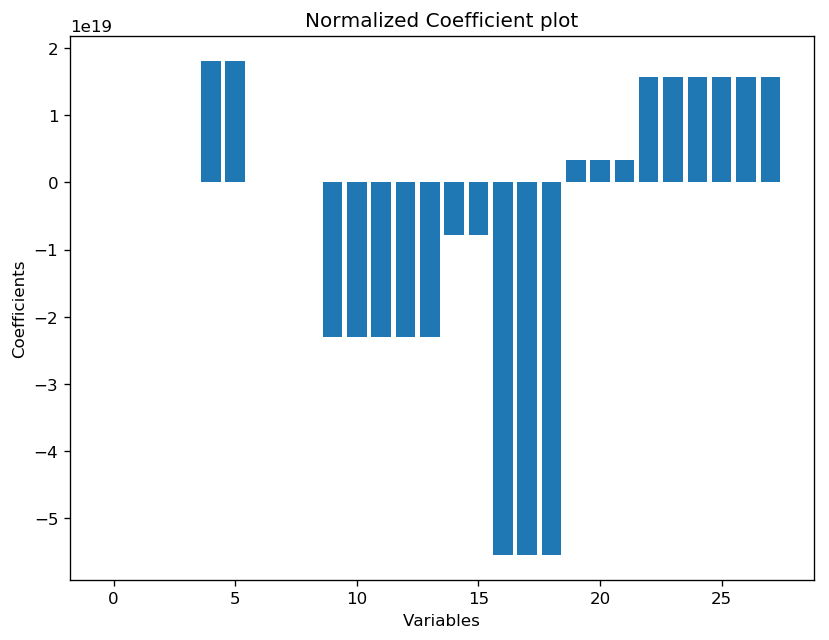

In [67]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

# We finally observed that the model 1 without normalization performed better so we will use that.